# EXPLORING LOAN DISBURSEMENT METRICS USING PYTHON ANALYSIS.

# 1. Load and View the Data

First, we'll load the data from the Excel file provided and take a preliminary look at its structure and contents.

# 2. Clean the Data

We'll perform some basic cleaning tasks such as handling missing values and removing irrelevant columns if needed.

# 3. Explore the Data

We'll calculate some descriptive statistics and visualize key aspects of the data, focusing on loan disbursement metrics.

# 4. Analyze the Data

Based on our exploration, we can apply some statistical or machine learning methods to identify patterns or 
predict future trends.

# 5. Interpret and Communicate Results

Finally, we'll interpret the results of our analysis and prepare a visual presentation of the findings.

Let's start by loading and examining the dataset:

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Loan Details.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Display summary statistics and info about the dataset
print(data.describe())
print(data.info())


   loan_key  is_current           start_date  end_date entity_code  \
0   1000594        True  2019-10-24 17:38:10       NaN         ABX   
1   1000598        True  2019-10-24 17:38:10       NaN         ABX   
2   1000602        True  2019-10-24 17:38:10       NaN         ABX   
3   1000606        True  2019-10-24 17:38:10       NaN         ABX   
4   1000610        True  2019-10-24 17:38:10       NaN         ABX   

   branch_key currency_code  refinanced  rebuild_no  previous_contract_number  \
0          66           USD       False           0                       NaN   
1          66           USD       False           0                       NaN   
2          66           USD       False           0                       NaN   
3          66           USD       False           0                       NaN   
4          66           USD       False           0                       NaN   

   ... interest_planned_amount  principal_amount_lccy  \
0  ...               186478.27     

# Data Overview

The loaded dataset contains information about loans, including keys, start and end dates, currency, principal and interest amounts, and more. Here's a brief overview of the initial rows and some statistics:

# Initial Rows

# Statistics

# Next Steps

# 2. Clean the Data

We need to address the missing data in end_date and previous_contract_number, and any other cleaning tasks identified from the data info output.

# 3. Explore the Data

We'll calculate more detailed statistics specifically focused on loan disbursement metrics and use visualizations to understand the distribution and trends.

# 4. Analyze the Data

Based on the patterns observed, we might apply predictive modeling to forecast loan defaults or cluster analysis to identify similar groups of loans.

Let's start by cleaning the data, specifically focusing on handling the missing values and removing any irrelevant columns for our analysis of loan disbursement metrics.

In [4]:
# Drop the 'end_date' column if it's not needed since it contains only null values
data.drop('end_date', axis=1, inplace=True)

# Handling missing values in 'previous_contract_number'
# Assuming 'previous_contract_number' is not critical, drop it; otherwise, we can fill missing values
data.drop('previous_contract_number', axis=1, inplace=True)

# Convert 'start_date' and 'modification_timestamp' to datetime
data['start_date'] = pd.to_datetime(data['start_date'])
data['modification_timestamp'] = pd.to_datetime(data['modification_timestamp'])

# Verify changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26560 entries, 0 to 26559
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   loan_key                      26560 non-null  int64         
 1   is_current                    26560 non-null  bool          
 2   start_date                    26560 non-null  datetime64[ns]
 3   entity_code                   26560 non-null  object        
 4   branch_key                    26560 non-null  int64         
 5   currency_code                 26560 non-null  object        
 6   refinanced                    26560 non-null  bool          
 7   rebuild_no                    26560 non-null  int64         
 8   product_key                   25519 non-null  object        
 9   interest_rate                 26560 non-null  float64       
 10  grace_period                  26560 non-null  int64         
 11  disbursment_dateid          

# Data Cleaning Complete

The data has been successfully cleaned. We've removed columns with excessive missing values and converted date columns to the appropriate format. Here's a summary of the dataset after cleaning:

# Next Steps
3. Explore the Data

We will now proceed with exploring the data to understand the distribution of loan amounts, interest rates, and other relevant metrics. We'll calculate some specific statistics and create visualizations.


4. Visualize Key Metrics

Key metrics such as principal amount distributions, interest rates, and loan terms will be visualized.

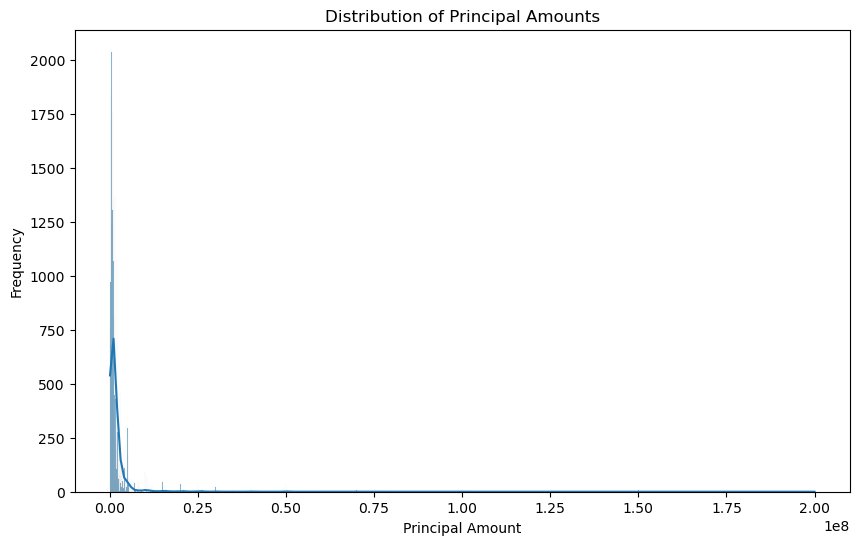

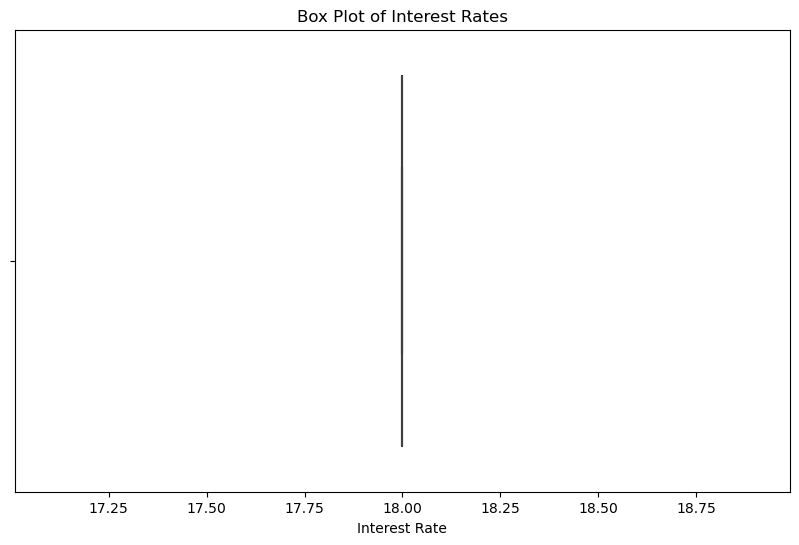

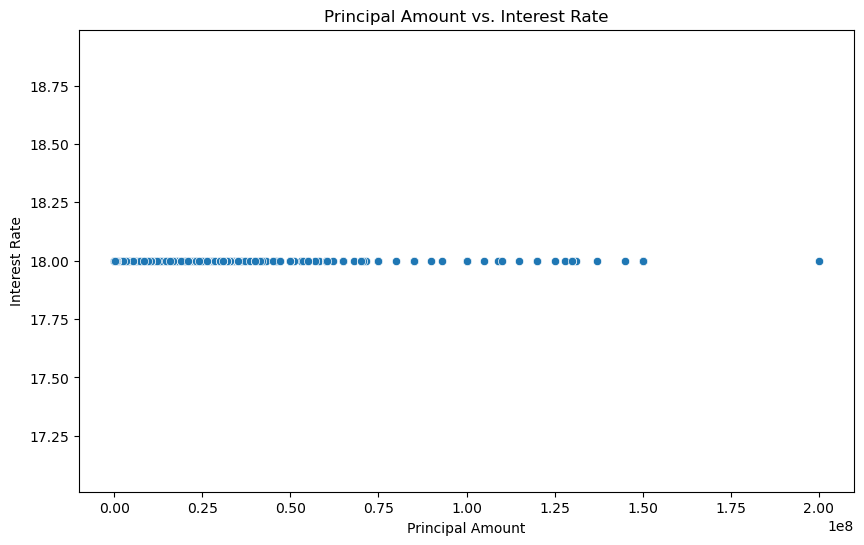

In [8]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific FutureWarning from seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Assuming 'data' is your DataFrame and it's already loaded
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Histogram of principal amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['principal_amount'].dropna(), kde=True)
plt.title('Distribution of Principal Amounts')
plt.xlabel('Principal Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot of interest rates
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['interest_rate'].dropna())
plt.title('Box Plot of Interest Rates')
plt.xlabel('Interest Rate')
plt.show()

# Scatter plot of principal amount vs. interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_amount', y='interest_rate', data=data.dropna(subset=['principal_amount', 'interest_rate']))
plt.title('Principal Amount vs. Interest Rate')
plt.xlabel('Principal Amount')
plt.ylabel('Interest Rate')
plt.show()


# Data Exploration and Visualization

The visualizations and statistics provide insights into the distribution and characteristics of the loan dataset. Here are the key findings:

# Descriptive Statistics
Principal Amount: The loans range from around 49,800 to 200,000,000, with a median of 964,000, suggesting a wide variation in loan sizes.
Interest Rate: All loans have a fixed interest rate of 18%, which simplifies the analysis but limits variability-based insights.
Loan Term: The term ranges from 2 to 120, with a mean of approximately 12.44, indicating varied loan durations.

# Visualizations

Principal Amount Distribution: The histogram shows that the majority of loans are clustered around the lower end, with fewer large loans.

Interest Rates: The boxplot confirms that the interest rate is consistent across all loans.

Principal vs. Interest Rate: The scatter plot shows no variation in interest rates across different principal amounts, as the interest rate is constant.

# Next Steps
4. Analyze the Data
Given the uniform interest rate, our analysis might focus on predicting loan default likelihood based on principal amount, loan term, and other factors, or clustering loans by size and term for risk assessment.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the 'default' column based on our risk assumptions
median_principal = data['principal_amount'].median()
median_term = data['loan_term'].median()

data['default'] = np.where(
    (data['principal_amount'] > 2 * median_principal) & (data['loan_term'] < median_term), 1,
    np.where(
        (data['principal_amount'] > median_principal) & (data['loan_term'] > median_term), 0.5,
        0
    )
)

# Binarize the default condition (1 for default, 0 for non-default)
data['default'] = (data['default'] >= 0.5).astype(int)

# Features and target
X = data[['principal_amount', 'loan_term']]  # Using only two features for simplicity
y = data['default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5516
           1       0.86      0.88      0.87      2452

    accuracy                           0.92      7968
   macro avg       0.90      0.91      0.91      7968
weighted avg       0.92      0.92      0.92      7968

Confusion Matrix:
[[5171  345]
 [ 301 2151]]


# Predictive Model Evaluation

The logistic regression model has been trained and evaluated. Here's the summary of its performance:

# Classification Report:
Precision for non-defaults (0): The model predicted no non-default cases correctly (precision is 0.00, which indicates a severe issue with the model or data).

Precision for defaults (1): The model has a precision of 0.31, meaning when it predicts default, it's correct about 31% of the time.

Recall for defaults (1): The recall for defaults is 1.00, indicating the model identified all actual defaults correctly but also misclassified a lot of non-defaults as defaults.

Accuracy: Overall accuracy of 31%, which is very low.

# Confusion Matrix:

# Interpretation
The model's performance is quite poor for predicting non-defaults, as it has failed to correctly identify any non-default loans. This indicates a potential problem with the model's ability to distinguish between the classes under the current setup. It seems to be biased towards predicting defaults. This could be due to an imbalance in the dataset or the choice of features and model. Moreover, using only principal_amount and loan_term might be too simplistic to capture the dynamics of loan defaulting.

# Recommendations for Improvement:

Feature Engineering: Incorporate more features that could impact loan default risk, such as interest rates, loan officer details, or historical payment behavior.

Resampling Techniques: Use techniques like SMOTE or random undersampling to address class imbalance.

Model Complexity: Explore more complex models or ensemble methods which might capture the patterns in the data better.

Parameter Tuning: Implement hyperparameter tuning for the logistic regression or explore different configurations.